In [30]:
import pandas as pd 
import seaborn as sns
from urllib.request import urlopen
from pgmpy.models import BayesianModel

In [31]:
names = "A,B,C,D,E,F,G,H,I,J,K,L,M,RESULT" 
names= names.split(",")

In [32]:
data = pd.read_csv(urlopen("http://bit.do/heart-disease"),names=names)
data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,RESULT
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [33]:
data.describe()

,A,B,C,D,E,F,G,H,I,J,K,RESULT
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [34]:
pairwise_correlation = data.corr()

In [35]:
pairwise_correlation

,A,B,C,D,E,F,G,H,I,J,K,RESULT
A,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.222853
B,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.224469
C,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.407075
D,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.157754
E,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.070909
F,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.059186
G,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.183696
H,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.415040
I,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.397057
J,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.504092


<AxesSubplot:>

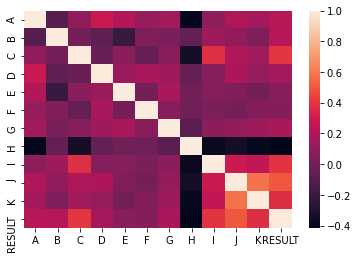

In [36]:
sns.heatmap(pairwise_correlation, xticklabels='auto', yticklabels='auto')

In [37]:
model = BayesianModel([("A","B"),("B","C"),("C","RESULT")])
model.fit(data)

In [38]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
print(infer.query(variables=["RESULT"],evidence ={"A":22}))


D:\Anaconda\lib\site-packages\pgmpy\factors\discrete\DiscreteFactor.py:518: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  warn(
Finding Elimination Order: : 100%|██████████| 2/2 [00:00<00:00, 334.39it/s]

Eliminating: B: 100%|██████████| 2/2 [00:00<00:00, 401.06it/s]

+-----------+---------------+
| RESULT    |   phi(RESULT) |
+===========+===============+
| RESULT(0) |        0.5387 |
+-----------+---------------+
| RESULT(1) |        0.1824 |
+-----------+---------------+
| RESULT(2) |        0.1196 |
+-----------+---------------+
| RESULT(3) |        0.1161 |
+-----------+---------------+
| RESULT(4) |        0.0433 |
+-----------+---------------+
